<H2>
<B>TOPIC    :</B> HIERARCHICAL AND DBSCAN <br>

<B><u><CENTER>MARKETING ANALYTICS</CENTER></u></B> </h2>

##<b>Importing the packages</b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  scipy import stats
plt.rc('figure',figsize=(20,10))

#Splitting the data
from sklearn.model_selection import train_test_split

#Caculating the performances
from sklearn import metrics

#Package for evaluating the model
from sklearn.metrics import classification_report,confusion_matrix

##<b>Load the data set</b>

In [ ]:
data= pd.read_csv('/content/face_book.csv')
data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1391716,33,2,1980,4,male,101,45,40,1,0,1,0,0,0
1,1619027,34,8,1979,8,female,405,44,33,1,0,1,0,0,0
2,2159629,40,28,1973,4,male,487,44,40,1,0,1,0,0,0
3,2088082,53,18,1960,4,male,195,44,25,1,0,1,0,0,0
4,1880790,59,2,1954,11,male,144,45,34,1,0,1,0,0,0


In [ ]:
data.shape

(1678, 15)

We have 1678 records with 15 attributes. 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   userid                 1678 non-null   int64 
 1   age                    1678 non-null   int64 
 2   dob_day                1678 non-null   int64 
 3   dob_year               1678 non-null   int64 
 4   dob_month              1678 non-null   int64 
 5   gender                 1675 non-null   object
 6   tenure                 1678 non-null   int64 
 7   friend_count           1678 non-null   int64 
 8   friendships_initiated  1678 non-null   int64 
 9   likes                  1678 non-null   int64 
 10  likes_received         1678 non-null   int64 
 11  mobile_likes           1678 non-null   int64 
 12  mobile_likes_received  1678 non-null   int64 
 13  www_likes              1678 non-null   int64 
 14  www_likes_received     1678 non-null   int64 
dtypes: int64(14), object(

##<b>Handling the missing values</b>

In [ ]:
data.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   3
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

We have the 3 null values in the gender. 

In [ ]:
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 
imp_mode.fit(data[['gender']])
data['gender']= imp_mode.transform(data[['gender']])

In [ ]:
data.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

After imputing the null values in gender column with simple imputer, we have 0 null values in the data

##<b>Checking the categorical values in the data</b>

In [ ]:
categorical=[col for col in data.columns if data[col].dtype=='object']
for i,j in enumerate(categorical):
    print("{0}: {1} has the unique elements:{2}".format(i+1,j,data[j].unique()))

1: gender has the unique elements:['male' 'female']


So, we have only one categorical column value, in the given data set.

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
data['gender']= le.fit_transform(data['gender']) 

##<h3><b>Correlation Heatmap</h3></b>

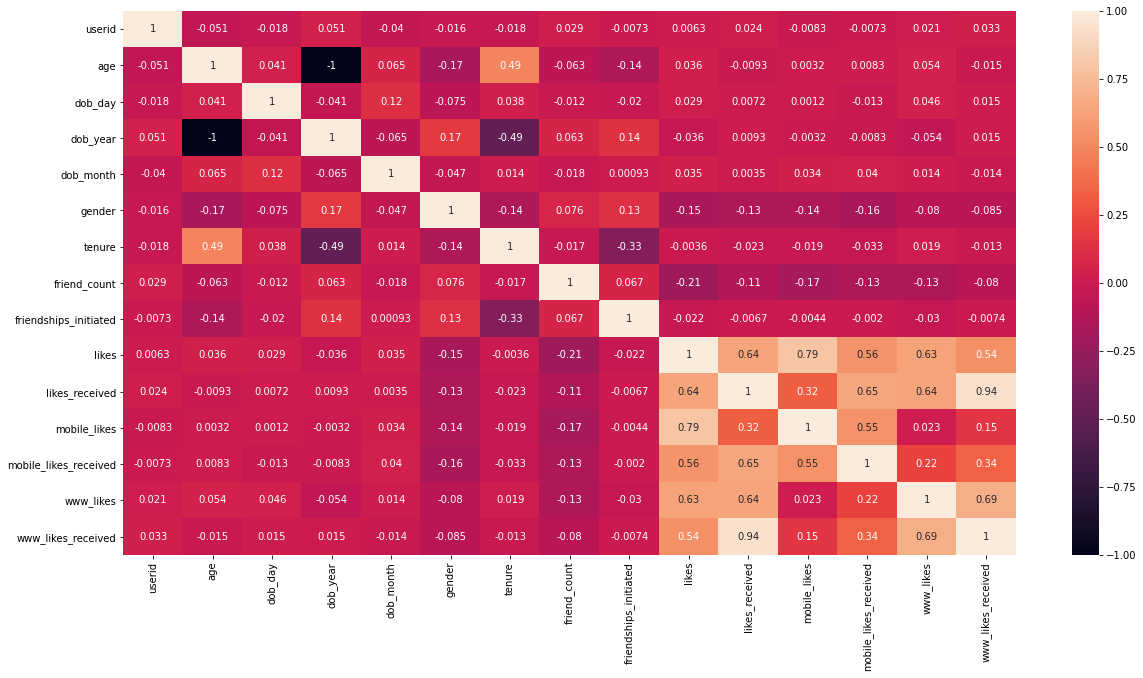

In [ ]:
sns.heatmap(data.corr('pearson'),annot=True)

<h3><i>
We can see that very few attributes highly positively correlated. Age and tenure is highly correlated. All kinds of different likes are also highly correlated. 
</h3></i>


# <B>SPLITTING THE DATA</B>


In [ ]:
#REMOVING UNNCESSARY COLUMNS
a_data=data.iloc[:, 3:]
a_data.tail()

,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1945,4,0,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1995,3,0,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1998,5,0,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1990,4,0,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1974,5,0,397.0,2049,768,9410,12443,9410,9530,0,2913


# Normalising the data

In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,0.999999,0.000024,0.000001,0.001423,0.000003,7.185367e-07,0.000073,0.000032,0.000029,7.185367e-07,0.0,7.185367e-07,0.0,0.0,0.0
1,0.999999,0.000021,0.000005,0.001222,0.000005,0.000000e+00,0.000250,0.000027,0.000020,6.176544e-07,0.0,6.176544e-07,0.0,0.0,0.0
2,1.000000,0.000019,0.000013,0.000914,0.000002,4.630423e-07,0.000226,0.000020,0.000019,4.630423e-07,0.0,4.630423e-07,0.0,0.0,0.0
3,1.000000,0.000025,0.000009,0.000939,0.000002,4.789082e-07,0.000093,0.000021,0.000012,4.789082e-07,0.0,4.789082e-07,0.0,0.0,0.0
4,0.999999,0.000031,0.000001,0.001039,0.000006,5.316912e-07,0.000077,0.000024,0.000018,5.316912e-07,0.0,5.316912e-07,0.0,0.0,0.0


# Dimensionality reduction

In [ ]:
# Reduce the dimensionality of data to 3 features
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(data_scaled)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['P1', 'P2', 'P3']

# <B>HIERARCHICAL CLUSTERING</B>

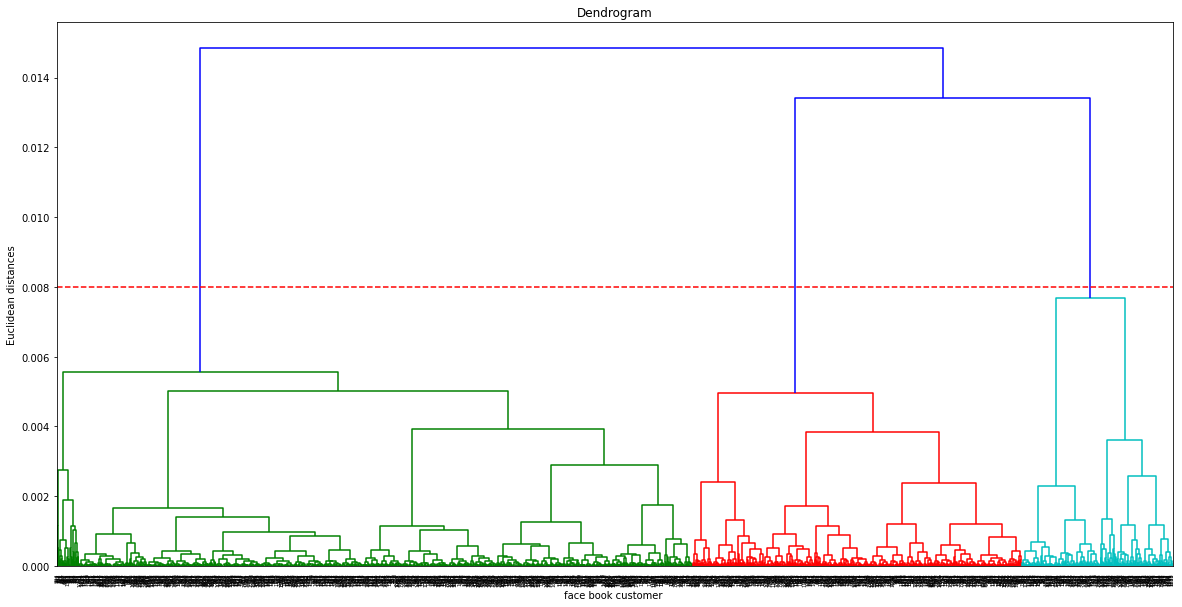

In [ ]:
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(df_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('face book customer ')
plt.ylabel('Euclidean distances')
plt.axhline(y=0.008, color='r', linestyle='--')
plt.show()

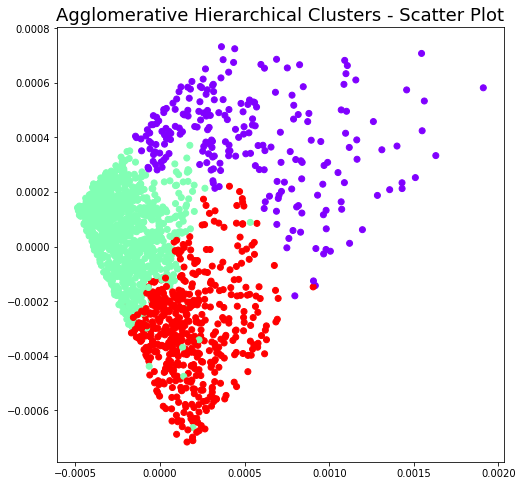

In [ ]:
# Create the clusters using Agglomerative hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['P1'], df_pca['P2'], c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

# <b> DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = .001, min_samples = 1000).fit(df_pca)

In [ ]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [ ]:
labels = dbsc.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 2
Estimated no. of noise points: 2


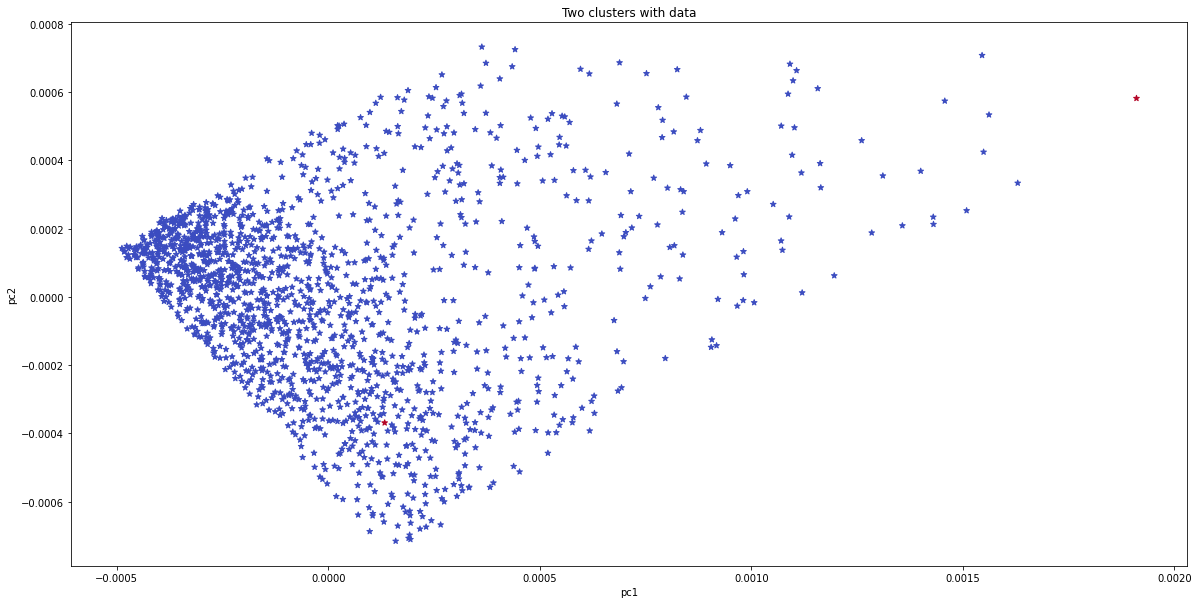

In [ ]:
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 0 else '#b40426', labels))
plt.scatter(df_pca['P1'], df_pca['P2'], c=colors, marker="*", picker=True, cmap ='rainbow')
plt.title('Two clusters with data')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

# <h2><B>INERENCE-</B></H2><BR>

1. We have 1678 records with 15 attributes.
2. We have the 3 null values in the gender.
3. After imputing the null values in gender column with simple imputer, we have 0 null values in the data
4. We have only one categorical variable in the data, which is converted to numeric using LabelEncoder.
5. We can see that very few attributes highly positively correlated. Age and tenure is highly correlated. All kinds of different likes are also highly cor.related. 

<br>

<b>HIERARCHICAL CLUSTERING- </b>
<BR>
Before clustering the data, I have normalised it. After normalizing I have reduced the number of dimensions of data using PCA. Later, by plotting the dendogram, I got to know that I got to know that we can effectively form 3 clusters in for the given data. So, i have formed 3 clusters that is fitted using the agglomerative clustering technique.

<br>

<b>DBSCAN-</b>
<br>
The Density Based Scan clustering algorithm is giving only 1 cluster if the epsilon value is greater than .01. And the noise is also 0 for greater epsilon value. With epsilon=.001 we are getting 2 clusters with 1 noise in it. And we can visually see that noise in the scatter plot. But another draw back is that for the greater x values in the plot i.e., limit value we cannot differentiate the noise(In my dataset). 

<bR>

<b><i><u>NOTE</u>-</b>The DBSCAN is useful for larger dataset whereas the Hierarchical clustering is useful for small dataset. </i>

